In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import numpy as np

# Load the primary dataset 
netflix_path = "Nida-Data/Output/netflix_shows.csv"
netflix_data = pd.read_csv(netflix_path)

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

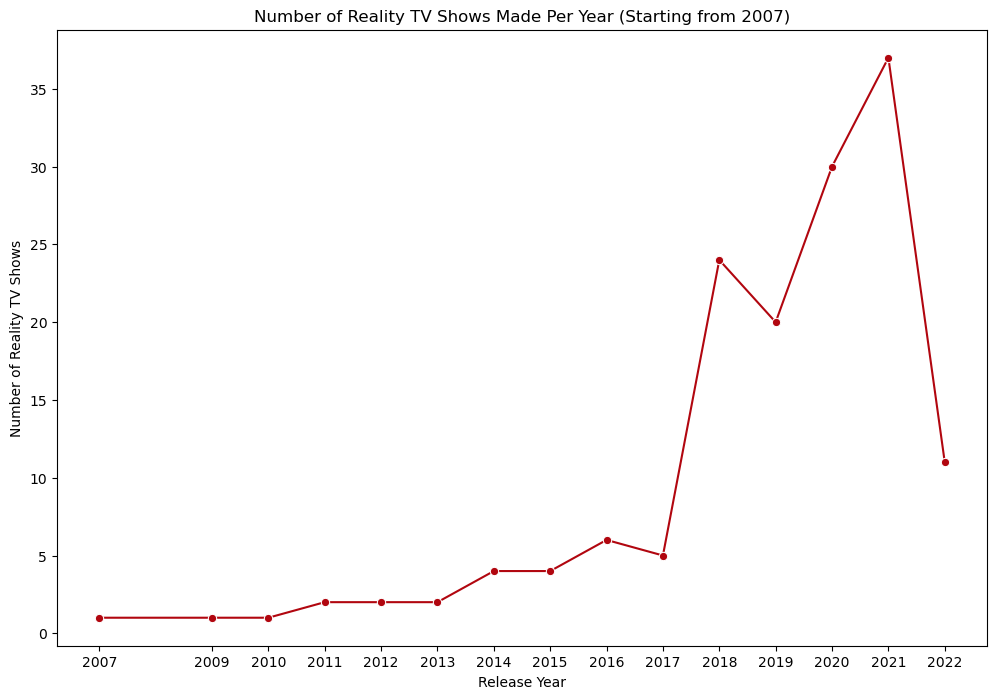

In [2]:
# Filter shows released from 2007 onwards
netflix_shows = netflix_data[(netflix_data['release_year'] >= 2007)].dropna().reset_index(drop=True)

# Filter shows with the 'reality' genre
reality_shows = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Count the number of reality shows per year
reality_shows_per_year = reality_shows.groupby('release_year').size().reset_index(name='num_shows')

plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='num_shows', data=reality_shows_per_year, marker='o', color='#B1060F')

# Adding labels and title
plt.title('Number of Reality TV Shows Made Per Year (Starting from 2007)')
plt.xlabel('Release Year')
plt.ylabel('Number of Reality TV Shows')
plt.xticks(reality_shows_per_year['release_year'])
plt.grid(False)

# Display the plot
plt.show()


In [3]:
#The line plot with markers shows the number of reality TV shows produced each year, starting from 2010.
#The count of reality shows has generally increased over the years, with a noticeable peak around 2020.
#The increasing trend in the number of reality TV shows suggests a growing audience interest in this genre.

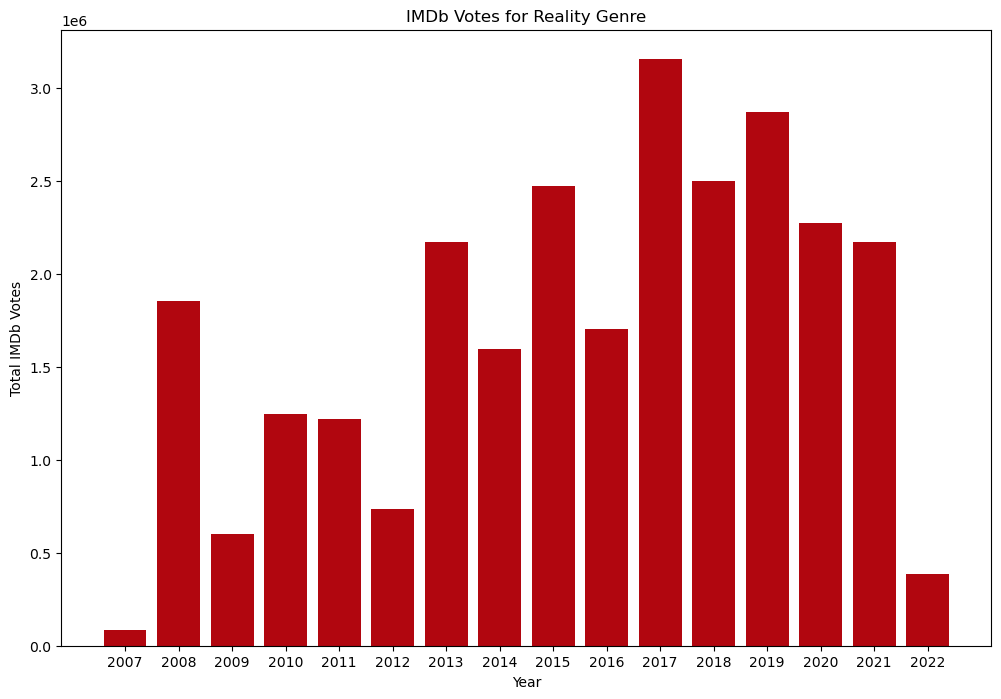

In [4]:
# Filter data for the 'reality' genre
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Convert 'release_year' to numeric type
netflix_shows['release_year'] = pd.to_numeric(netflix_shows['release_year'], errors='coerce')

# Filter data for the years 2007 onwards
netflix_shows_after_2007 = netflix_shows[netflix_shows['release_year'] >= 2007]

# Group by 'release_year' and sum the IMDb votes
votes_by_year = netflix_shows_after_2007.groupby('release_year')['imdb_votes'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(votes_by_year['release_year'], votes_by_year['imdb_votes'], color='#B1060F')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total IMDb Votes')
plt.title('IMDb Votes for Reality Genre')

# Show every year on the x-axis
plt.xticks(votes_by_year['release_year'])

# Show the plot
plt.show()


In [15]:
from scipy.stats import linregress

# Filter data for the 'reality' genre
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Convert 'release_year' to numeric type
netflix_shows['release_year'] = pd.to_numeric(netflix_shows['release_year'], errors='coerce')

# Filter data for the years 2007 onwards
netflix_shows_after_2007 = netflix_shows[netflix_shows['release_year'] >= 2007]

# Group by 'release_year' and sum the IMDb votes
votes_by_year = netflix_shows_after_2007.groupby('release_year')['imdb_votes'].sum().reset_index()

# Perform linear regression for all years
slope_all, intercept_all, r_value_all, p_value_all, std_err_all = linregress(votes_by_year['release_year'], votes_by_year['imdb_votes'])

# Filter data for the year 2020
netflix_shows_2020 = netflix_shows[netflix_shows['release_year'] == 2020]

# Calculate the total IMDb votes for 2020
imdb_votes_2020 = netflix_shows_2020['imdb_votes'].sum()

# Perform linear regression for 2020
slope_2020, intercept_2020, r_value_2020, p_value_2020, std_err_2020 = linregress([2020], [imdb_votes_2020])

# Output the regression results

print("Null hypothesis: The decline in IMDb votes in 2020 is statistically significant")
print(" ")
print(f"Slope (all years): {slope_all}, P-value (all years): {p_value_all}")
print(f"Slope (2020): {slope_2020}, P-value (2020): {p_value_2020}")
print(" ")

# Check for significance for 2020
if p_value_2020 < 0.05:
    print("The decline in IMDb votes in 2020 is statistically significant. Therefore we accept our null hypothesis.")
else:
    print("The decline in IMDb votes in 2020 is not statistically significant.Therefore we reject our null hypothesis.")


Null hypothesis: The decline in IMDb votes in 2020 is statistically significant
 
Slope (all years): 91508.84705882354, P-value (all years): 0.060817320872971266
Slope (2020): nan, P-value (2020): nan
 
The decline in IMDb votes in 2020 is not statistically significant.Therefore we reject our null hypothesis.


C:\Users\maria\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maria\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maria\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


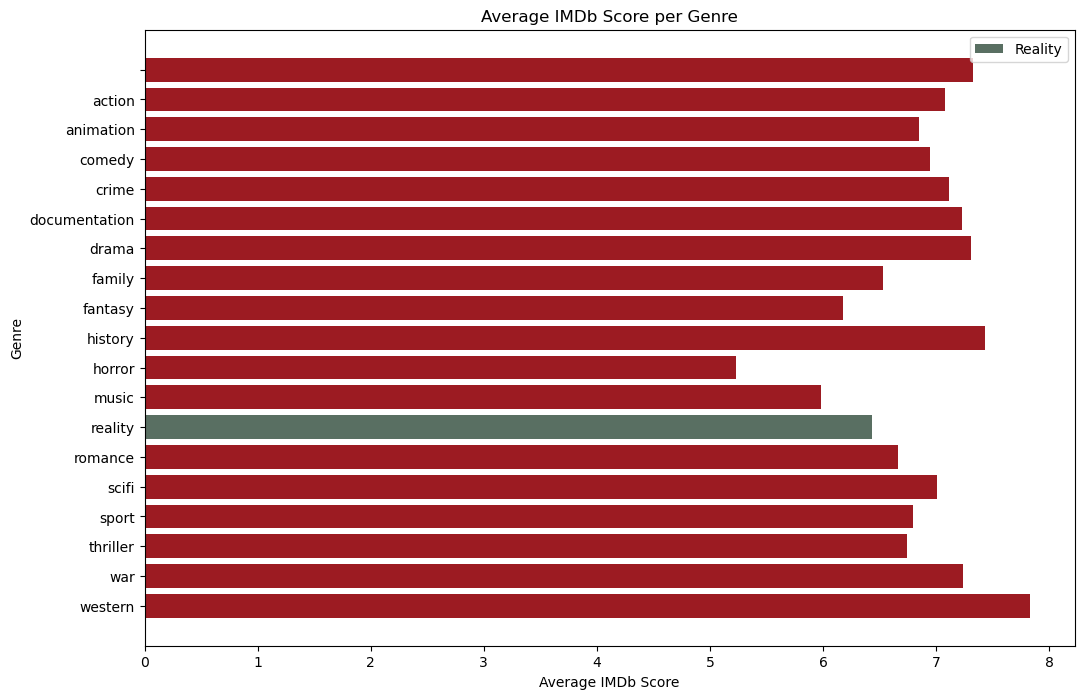

In [5]:
# Extract the first genre from the list of genres
netflix_shows['primary_genre'] = netflix_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')

# Group by genre and calculate the average IMDb score
genre_avg_imdb = netflix_shows.groupby('primary_genre')['imdb_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_score', y='primary_genre', data=genre_avg_imdb, color='#B1060F')

# Set labels and title
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score per Genre')

reality_index = genre_avg_imdb[genre_avg_imdb['primary_genre'] == 'reality'].index[0]
plt.barh(reality_index, genre_avg_imdb.loc[reality_index, 'imdb_score'], color='#596F62', label='Reality')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [6]:
#The code extracted the primary genre from the list of genres for each TV show.
#Bar chart was created to visualize the average IMDb score for each genre.
#In the bar chart, genres are represented by bars.
#The analysis provides insights into the average IMDb scores for different genres, helping understand audience perceptions.

In [7]:
# Split the DataFrame into reality and other genres
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]
other_data = netflix_shows[~netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Perform a t-test
t_statistic, p_value = ttest_ind(reality_data['imdb_score'].dropna(), other_data['imdb_score'].dropna(), equal_var=False)

print("Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. ")
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference. Therefore we reject our null hypothesis.")
else:
    print("There is no significant difference. Therefore we accept our null hypothesis.")
    


Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. 
T-statistic: -5.958724175034223
P-value: 1.4171989774899512e-08
There is a significant difference. Therefore we reject our null hypothesis.


In [8]:
#A hypothesis test was conducted to compare the IMDb scores of reality TV shows with those of other genres on Netflix.
#The test results, including the T-statistic and P-value, revealed a significant difference in IMDb scores between reality TV and other genres.
#The analysis suggests that reality TV shows, on average, have significantly different IMDb scores compared to other genres. The significance level (alpha) was set at 0.05.

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


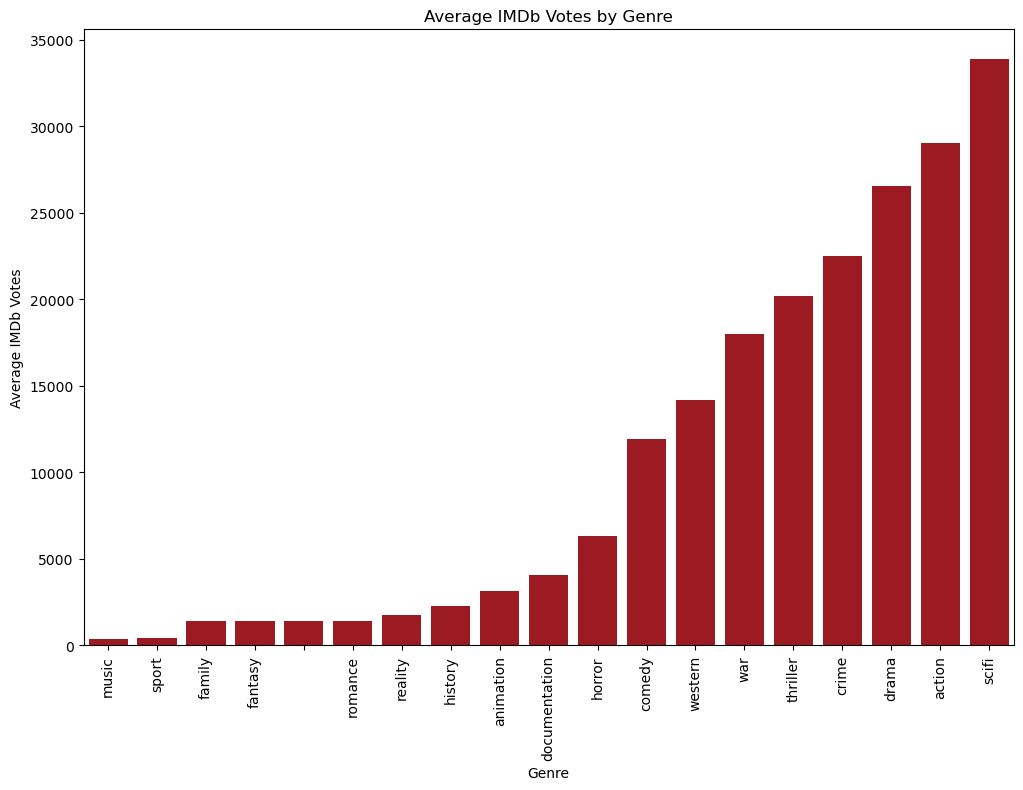

In [9]:
# Extract the first genre from the list of genres
netflix_shows['primary_genre'] = netflix_shows['genres'].apply(
    lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else ''
)

# Calculate the average IMDb votes for each genre
genre_avg_votes = netflix_shows.groupby('primary_genre')['imdb_votes'].mean().reset_index()

genre_avg_votes = genre_avg_votes.sort_values(by='imdb_votes')

plt.figure(figsize=(12, 8))

sns.barplot(x='primary_genre', y='imdb_votes', data=genre_avg_votes, color='#B1060F')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Average IMDb Votes')
plt.title('Average IMDb Votes by Genre')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [10]:
#A bar chart was generated to display the average IMDb votes for each genre in ascending order.
#Genres were sorted based on the average votes received.
#The visualizations aid decision-makers in understanding trends and making informed choices about content creation and distribution.